In [2]:
!gdown 1dvWORIUL3zWi4Df4hNUeHYfzPM_YRRGs

Downloading...
From: https://drive.google.com/uc?id=1dvWORIUL3zWi4Df4hNUeHYfzPM_YRRGs
To: /home/yuuhanase/FPTU/EXE101/PaperClipAI_EnglishGrading/experiments/train.csv
100%|██████████████████████████████████████| 9.29M/9.29M [00:01<00:00, 5.99MB/s]


In [1]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")


In [3]:
from datasets import load_dataset
dataset = load_dataset("csv", data_files="train.csv", split='train')

In [4]:
dataset

Dataset({
    features: ['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions'],
    num_rows: 3911
})

In [12]:
def get_stat(batch):
    batch['text_len'] = len(tokenizer(batch['full_text'])['input_ids'])
    return batch
stat_df = dataset.map(get_stat, num_proc=20)
stat_df

Map (num_proc=20):   0%|          | 0/3911 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (607 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (661 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (644 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (783 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (747 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

Dataset({
    features: ['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions', 'text_len'],
    num_rows: 3911
})

In [13]:
import pandas as pd
df = pd.DataFrame(stat_df)
df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_len
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,304
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,607
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,396
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,891
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,279


In [14]:
df.describe()

,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_len
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,3.127077,3.028254,3.235745,3.116850,3.032856,3.081053,518.136282
std,0.662542,0.644399,0.583148,0.655997,0.699841,0.671450,228.242073
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000
25%,2.500000,2.500000,3.000000,2.500000,2.500000,2.500000,356.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,485.000000
75%,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,633.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1548.000000


In [29]:
df[df['text_len']==16]

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,text_len
3679,F69C85F4C3CA,the memorable teacher ever had\r\n\r\nwas a te...,1.0,1.0,1.5,1.0,1.0,1.5,16


array([[<Axes: title={'center': 'cohesion'}>,
        <Axes: title={'center': 'syntax'}>,
        <Axes: title={'center': 'vocabulary'}>],
       [<Axes: title={'center': 'phraseology'}>,
        <Axes: title={'center': 'grammar'}>,
        <Axes: title={'center': 'conventions'}>],
       [<Axes: title={'center': 'text_len'}>, <Axes: >, <Axes: >]],
      dtype=object)

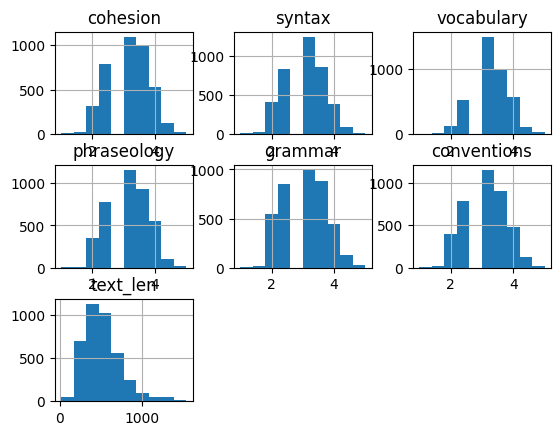

In [15]:
df.hist()

In [7]:
tkn = tokenizer(dataset['train']['full_text'][0], return_tensors='pt')
tkn['input_ids'][0]
tokenizer.decode(tkn['input_ids'][0])

"[CLS] i think that students would benefit from learning at home, because they wont have to change and get up early in the morning to shower and do there hair. taking only classes helps them because at there house they'll be pay more attention. they will be comfortable at home. the hardest part of school is getting ready. you wake up go brush your teeth and go to your closet and look at your cloths. after you think you picked a outfit u go look in the mirror and youll either not like it or you look and see a stain. then you'll have to change. with the online classes you can wear anything and stay home and you wont need to stress about what to wear. most students usually take showers before school. they either take it before they sleep or when they wake up. some students do both to smell good. that causes them do miss the bus and effects on there lesson time cause they come late to school. when u have online classes u wont need to miss lessons cause you can get everything set up and go 

In [8]:
from unstructured.cleaners.core import clean_extra_whitespace

def clean_text(batch):
    text = batch['full_text']
    text = text.replace("\n", ' ')
    text = text.replace("\t", ' ')
    text = text.replace("\r", ' ')
    
    text = clean_extra_whitespace(text)
    batch['full_text'] = text
    return batch
    
clean_ds = dataset.map(clean_text)

Map:   0%|          | 0/3911 [00:00<?, ? examples/s]

In [9]:
def get_ohe_transform():
    ohe_transform = {}
    for i in range(2, 11):
        ohe = [0] * 9
        ohe[i-2] = 1
        ohe_transform[i/2] = ohe
    return ohe_transform
get_ohe_transform()

{1.0: [1, 0, 0, 0, 0, 0, 0, 0, 0],
 1.5: [0, 1, 0, 0, 0, 0, 0, 0, 0],
 2.0: [0, 0, 1, 0, 0, 0, 0, 0, 0],
 2.5: [0, 0, 0, 1, 0, 0, 0, 0, 0],
 3.0: [0, 0, 0, 0, 1, 0, 0, 0, 0],
 3.5: [0, 0, 0, 0, 0, 1, 0, 0, 0],
 4.0: [0, 0, 0, 0, 0, 0, 1, 0, 0],
 4.5: [0, 0, 0, 0, 0, 0, 0, 1, 0],
 5.0: [0, 0, 0, 0, 0, 0, 0, 0, 1]}

In [13]:
import torch
def transform(batch):
    tokenized_input = tokenizer(batch['full_text'], return_tensors='pt', truncation=True)
    input_ids = tokenized_input['input_ids'][0]
    attention_mask = tokenized_input['attention_mask'][0]
    targets_feat = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
    targets = []
    ohe_transform = get_ohe_transform()
    for feat in targets_feat:
        targets.append(
            torch.tensor(
                ohe_transform[
                    batch[feat]
                ]
            )
        )
    return {
        'input_ids': input_ids,
        'attention_mask': attention_mask,
        'target': torch.stack(targets)
    }

transform(clean_ds['train'][0])['target']
# train_ds = clean_ds.map(transform)
# train_ds

tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [8]:
import torch
from torch import nn
input = torch.randn(1, 54)
layer = nn.Unflatten(1, (6, 9))
acti = nn.Softmax(dim=2)
a = layer(input)
b = acti(a)
b

tensor([[[0.0504, 0.1033, 0.1804, 0.1586, 0.0752, 0.0274, 0.0879, 0.0530,
          0.0750],
         [0.1052, 0.2306, 0.0994, 0.3622, 0.2380, 0.1191, 0.1324, 0.1611,
          0.2881],
         [0.1272, 0.0481, 0.0872, 0.1264, 0.2176, 0.0972, 0.0654, 0.1623,
          0.2001],
         [0.0619, 0.3011, 0.0763, 0.1795, 0.1090, 0.0909, 0.2856, 0.3638,
          0.2602],
         [0.1341, 0.1223, 0.4826, 0.0248, 0.2726, 0.0247, 0.3321, 0.0453,
          0.0632],
         [0.5212, 0.1946, 0.0741, 0.1484, 0.0876, 0.6407, 0.0965, 0.2146,
          0.1134]]])

In [9]:
sum([0.0504, 0.1052, 0.1272, 0.0619, 0.1341, 0.5212])

1.0